In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
%matplotlib inline


In [2]:
# import dataset
df_canada = pd.read_excel("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx",
                         sheet_name = "Canada by Citizenship",
                         skiprows = range(20),
                         skipfooter=2)
print("Get ready you are in..")

Get ready you are in..


In [3]:
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_canada.drop(["Coverage", "AREA", "REG", "DEV"], axis = 1, inplace = True)

In [5]:
df_canada.head()

,Type,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
df_canada.tail()

,Type,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Zimbabwe,Africa,Eastern Africa,Developing regions,72,114,102,44,32,...,1450,615,454,663,611,508,494,434,437,407


In [7]:
# make country_name index
df_canada.rename(columns={"OdName":"Country", "AreaName":"Continent", "RegName":"Region"}, inplace = True)
df_canada.head()


,Type,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [8]:
# make country index
df_canada.set_index("Country", inplace = True)


In [9]:
df_canada.head()

,Type,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Immigrants,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Immigrants,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Immigrants,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Immigrants,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [10]:
# make total columns
df_canada["Total"] = df_canada.sum(axis = 1)
print(df_canada.shape)
df_canada.head()

(195, 39)


,Type,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Immigrants,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Immigrants,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Immigrants,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Immigrants,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [11]:
df_canada


,Type,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Immigrants,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Immigrants,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Immigrants,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Immigrants,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Immigrants,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Immigrants,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Immigrants,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985


In [12]:
# lets examine type of column labels
all(isinstance(column, str) for column in df_canada.columns)

False

In [13]:
df_canada.columns = list(map(str, df_canada.columns))

In [14]:
all(isinstance(column, str) for column in df_canada.columns)

True

In [15]:
# check diamensions
print("Diamention:" +  str(df_canada.shape))

Diamention:(195, 39)


In [16]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [17]:
# data visualation 
mpl.style.use("ggplot")

In [18]:
# Area Plot
df_canada.sort_values(["Total"], ascending= False, axis= 0, inplace = True)
df_canada.head()

,Type,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Immigrants,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Immigrants,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Immigrants,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Immigrants,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Immigrants,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [19]:
df_top5 = df_canada.head(5)

df_top5 =  df_top5[years].transpose()
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


In [20]:
#df_top5.rename(columns={"United Kingdom of Great Britain and Northern Ireland":"Uk&Ire"}, inplace = True)

In [21]:
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


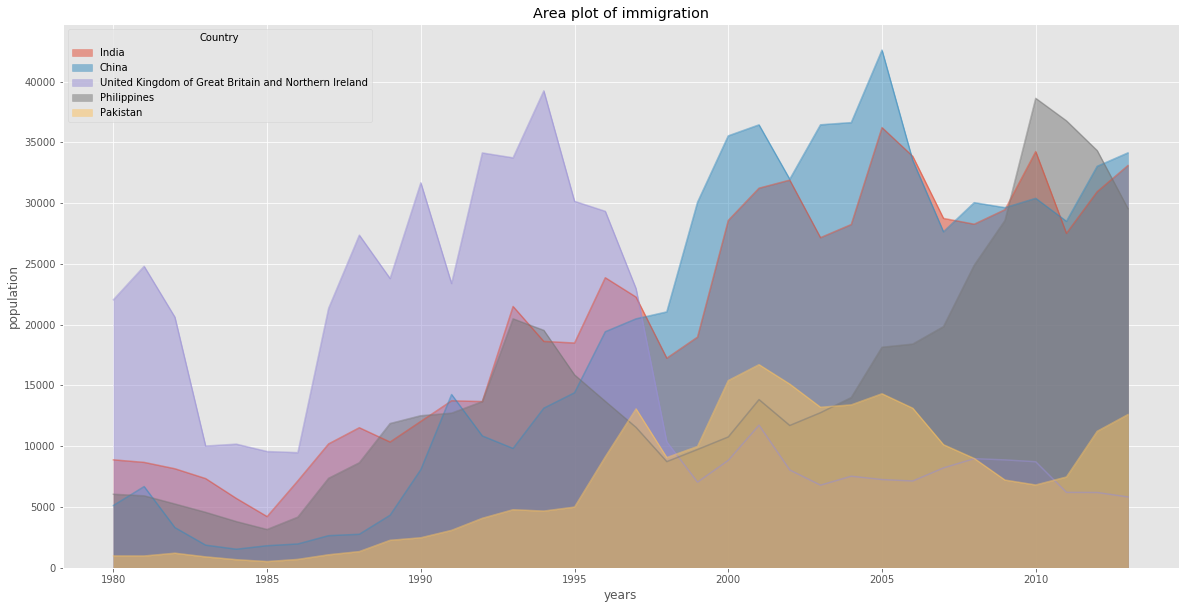

In [22]:
# now plot Area plot
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind = "area",
            stacked = False,
            figsize = (20, 10))

plt.title("Area plot of immigration")
plt.xlabel("years")
plt.ylabel("population")
plt.show()



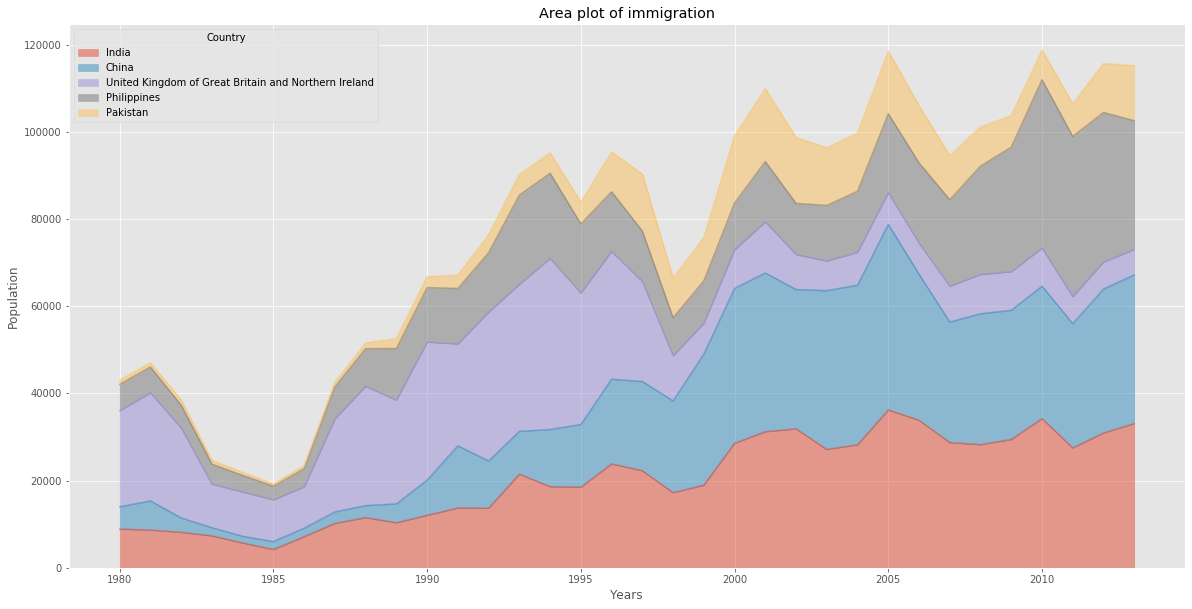

In [23]:
df_top5.plot(kind = "area",
            alpha = 0.5,
            stacked = True ,
            figsize = (20, 10))

plt.title("Area plot of immigration")
plt.xlabel("Years")
plt.ylabel("Population")
plt.show()




Text(0, 0.5, 'Population')

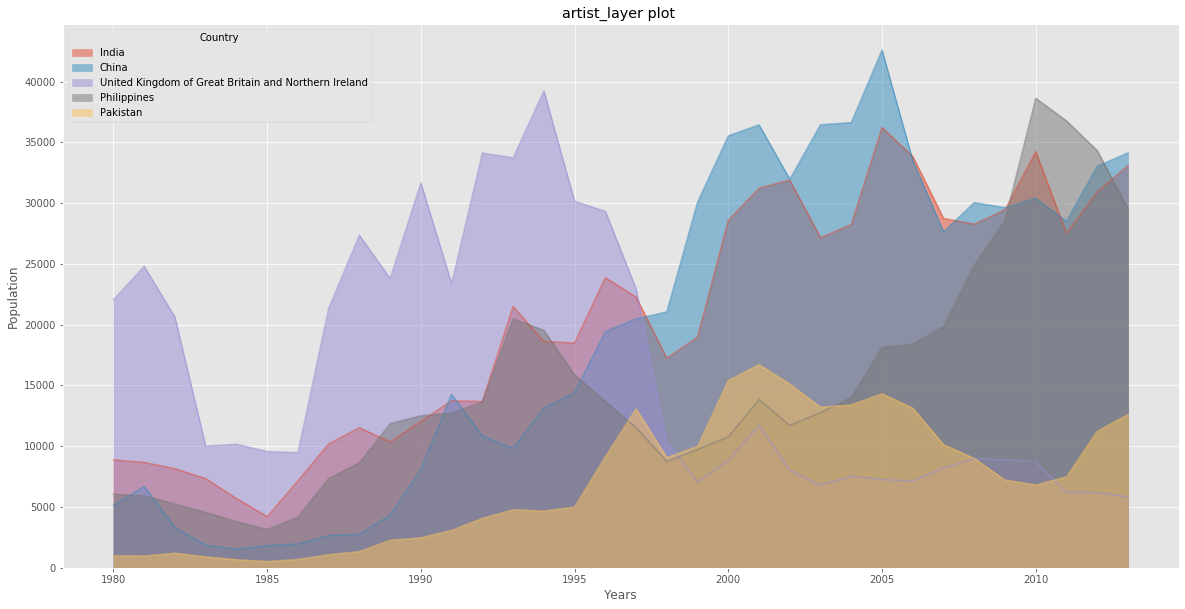

In [24]:
# artist layer

ax =  df_top5.plot(kind= "area", alpha= 0.5, figsize = (20,10),stacked = False)

ax.set_title("artist_layer plot ")
ax.set_xlabel("Years")
ax.set_ylabel("Population")

In [25]:
# histogram 
df_canada["2013"].head()


Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [26]:
count, bin_edges = np.histogram(df_canada["2013"])

print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


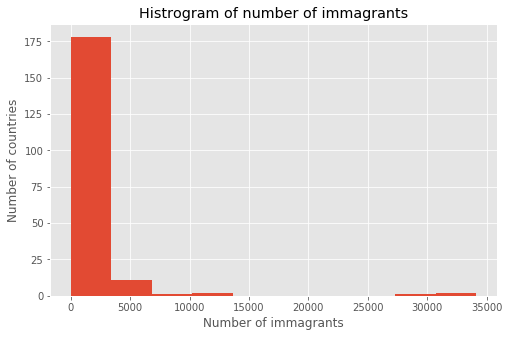

In [27]:
df_canada["2013"].plot(kind= "hist", figsize= (8, 5))

plt.title("Histrogram of number of immagrants")
plt.ylabel("Number of countries")
plt.xlabel("Number of immagrants")

plt.show()

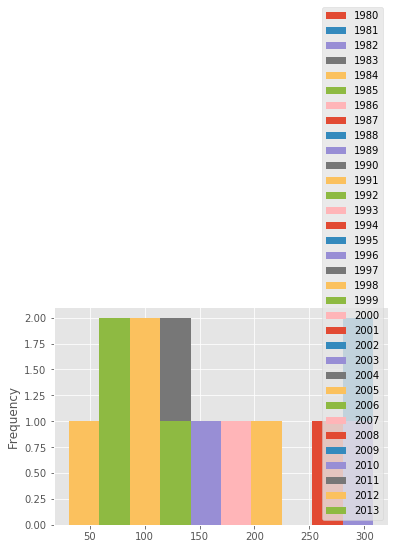

In [28]:
# for specific countries plot histrogram

df_canada.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

In [29]:
df_t = df_canada.loc[["Denmark", "Norway","Sweden"], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


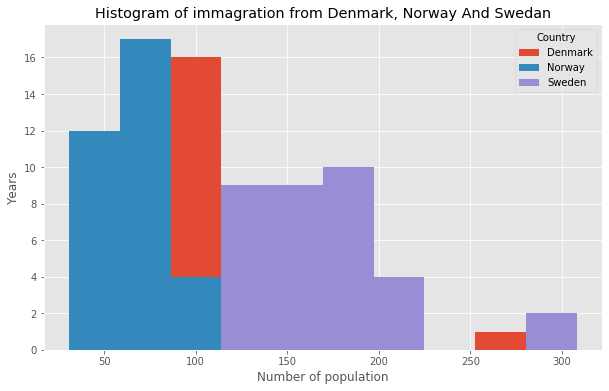

In [30]:
df_t.plot(kind ="hist", figsize=(10, 6))

plt.title("Histogram of immagration from Denmark, Norway And Swedan")
plt.ylabel("Years")
plt.xlabel("Number of population")

plt.show()

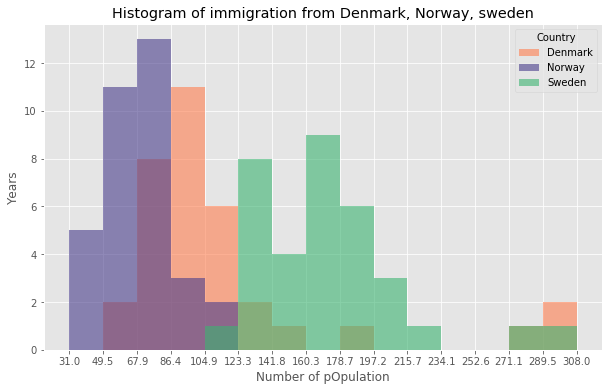

In [31]:
# let do the above plot more good looking
count, bin_edges = np.histogram(df_t, 15)

# unstacked histrogram
df_t.plot(kind="hist",
         figsize= (10, 6),
         bins = 15,
         alpha = 0.6,
         xticks =  bin_edges,
         color = ['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title("Histogram of immigration from Denmark, Norway, sweden")
plt.xlabel("Number of pOpulation")
plt.ylabel("Years")

plt.show()


In [32]:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


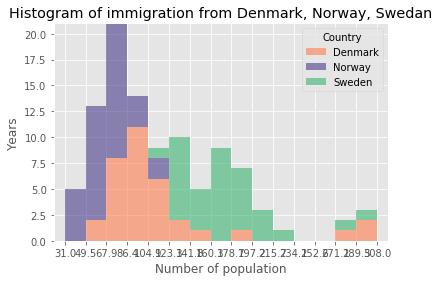

In [33]:
# more good looking  
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10 # buffer for bin_edges 
xmax = bin_edges[-1] + 10 # buffer for last columns

#plot stacked histogram
df_t.plot(kind= "hist",
         stacked = True,
         alpha = 0.6,
         xticks = bin_edges,
         bins = 15,
         color =['coral', 'darkslateblue', 'mediumseagreen'],
         xlim = (xmin, xmax)
         )

plt.title("Histogram of immigration from Denmark, Norway, Swedan")
plt.xlabel("Number of population")
plt.ylabel("Years")

plt.show()



In [36]:
df_canada.head()

,Type,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Immigrants,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Immigrants,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Immigrants,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Immigrants,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Immigrants,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [38]:
# BoxPlot
df_japan =  df_canada.loc[["Japan"], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


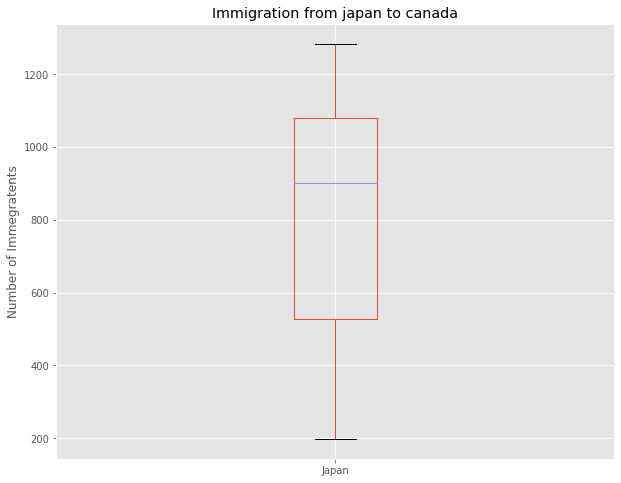

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [41]:
df_japan.plot(kind = "box", figsize=(10, 8))

plt.title("Immigration from japan to canada")
plt.ylabel("Number of Immegratents")

plt.show()
df_japan.describe()